In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/4r/8l8ztg457hq357p0kylhwhfw0000gn/T/ipykernel_49769/3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def graph_labor(df):
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    # sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Year-Month", y="Employment", data=df, marker="o")
    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.xticks(rotation=45)
    plt.show()


def graph_real_estate(df):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))
    sns.lineplot(x="Date", y="Price", data=df, marker="o")
    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

def graph_real_estates(df, hue_column):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))

    # Use hue to differentiate between multiple lines
    sns.lineplot(x="Date", y="Price", hue=hue_column, data=df, marker="o")

    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

In [7]:
sc_employment = pd.read_csv(
    "./data/processed_employment/Santa_Clara_County,_California.csv"
)
sc_real_estate = pd.read_csv("./data/processed_zillow/Santa_Clara_County.csv")

In [6]:
sac_employment = pd.read_csv(
    "./data/processed_employment/Sacramento_County,_California.csv"
)
sac_real_estate = pd.read_csv("./data/processed_zillow/Sacramento_County.csv")

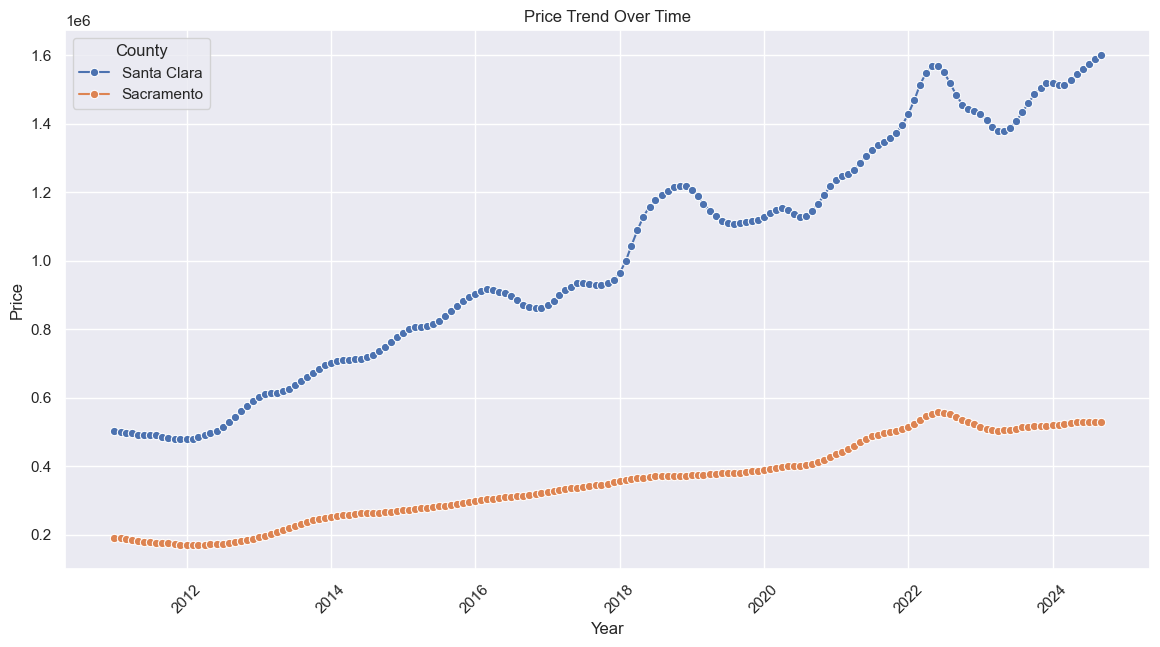

In [8]:
sc_real_estate["County"] = "Santa Clara"
sac_real_estate["County"] = "Sacramento"

sc_and_sac = pd.concat([sc_real_estate, sac_real_estate], axis=0)
sc_and_sac

graph_real_estates(sc_and_sac, "County")

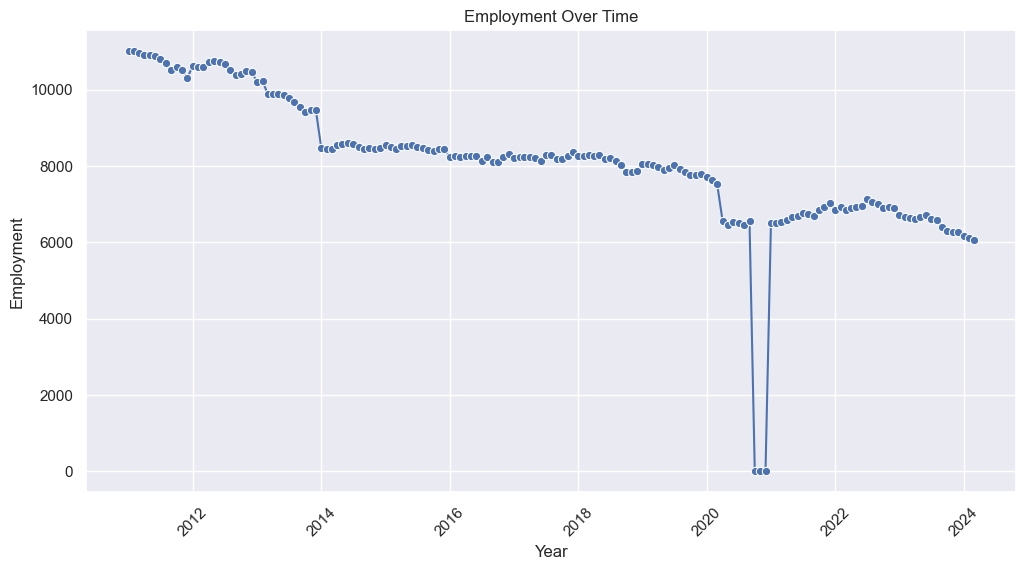

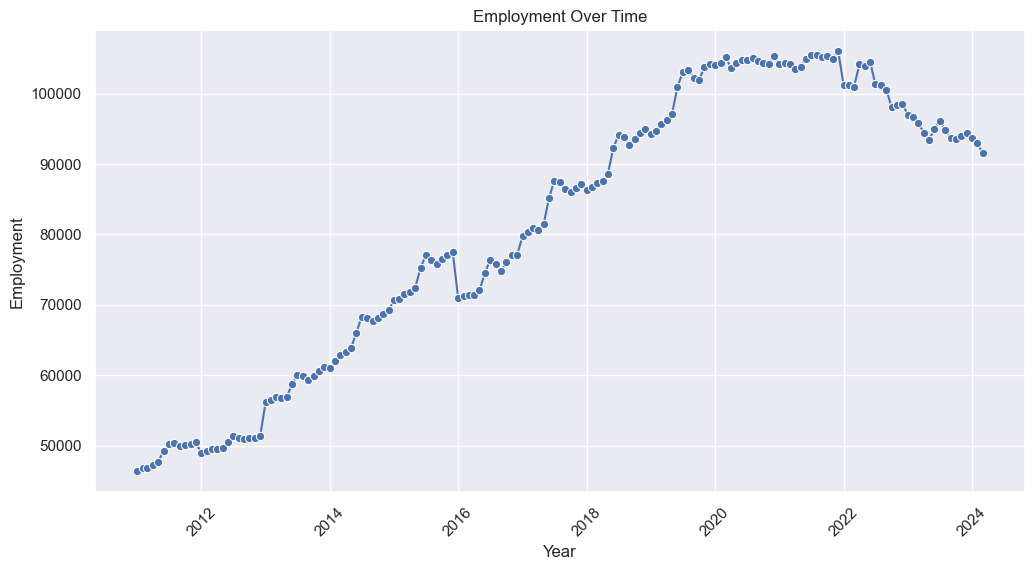

In [11]:
graph_labor(sac_employment)
graph_labor(sc_employment)

In [16]:
import statsmodels.formula.api as smf

sc_real_estate["county"] = "Santa Clara"
sac_real_estate["county"] = "Sacramento"

# Concatenate dataframes
data = pd.concat([sc_real_estate, sac_real_estate])

print(data)
data["Date"] = pd.to_datetime(data["Date"])
data["treatment"] = data["county"].apply(lambda x: 1 if x == "Santa Clara" else 0)
# Define post variable based on intervention year, e.g., 2020
intervention_year = 2012
intervention_date = pd.to_datetime(f"{intervention_year}-01-01")
data["post"] = data["Date"].apply(lambda x: 1 if x >= intervention_date else 0)

# Interaction term for DiD
data["treatment_post"] = data["treatment"] * data["post"]

model = smf.ols("Price ~ treatment + post + treatment_post", data=data).fit()
print(model.summary())

           Date   Price       County       county
0    2011-01-01  504038  Santa Clara  Santa Clara
1    2011-02-01  500356  Santa Clara  Santa Clara
2    2011-03-01  498355  Santa Clara  Santa Clara
3    2011-04-01  495651  Santa Clara  Santa Clara
4    2011-05-01  491514  Santa Clara  Santa Clara
..          ...     ...          ...          ...
160  2024-05-01  528120   Sacramento   Sacramento
161  2024-06-01  529002   Sacramento   Sacramento
162  2024-07-01  529445   Sacramento   Sacramento
163  2024-08-01  529215   Sacramento   Sacramento
164  2024-09-01  529234   Sacramento   Sacramento

[330 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic): 